# Introduction to Artificial Neural Networks with Keras

### The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris setosa?

In [3]:
iris['data'].shape

(150, 4)

In [4]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [5]:
y_pred = per_clf.predict([[2, 0.5]])

### Installing TensorFlow 2

In [66]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
tf.__version__

'2.0.0'

In [8]:
keras.__version__

'2.2.4-tf'

### Building an image Classifier Using the Sequential API

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [23]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_train_full.dtype

dtype('uint8')

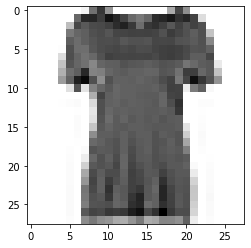

In [32]:
plt.imshow(X_train_full[10], cmap='gray_r')
plt.show()

In [24]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [26]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"]

In [27]:
class_names[y_train[0]]

'Coat'

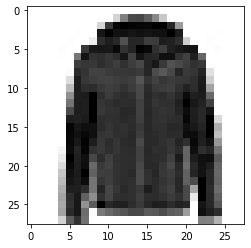

In [30]:
plt.imshow(X_train[0], cmap='gray_r')
plt.show()

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [37]:
# the below model is the same as above
same_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.layers

In [42]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [43]:
model.get_layer('dense') is hidden1

True

In [49]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04863663,  0.01173522,  0.07113898, ...,  0.02106541,
         0.02629261, -0.06514039],
       [ 0.01154803,  0.05726735, -0.05056894, ...,  0.00699212,
        -0.02887664, -0.03499753],
       [ 0.01394706, -0.03175285,  0.02652083, ...,  0.07216759,
         0.0237656 , -0.02916687],
       ...,
       [ 0.00024964,  0.03812484,  0.0179503 , ..., -0.04651172,
        -0.06905635, -0.06490027],
       [ 0.05930227,  0.02096572, -0.02719131, ..., -0.0540337 ,
         0.04617408,  0.02858833],
       [-0.01038714,  0.04259326,  0.00381252, ...,  0.01348916,
         0.03455678, -0.0054835 ]], dtype=float32)

In [50]:
weights.shape

(784, 300)

In [46]:
biases.shape

(300,)

In [51]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

In [54]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 144us/sample - loss: 0.7416 - accuracy: 0.7605 - val_loss: 0.5016 - val_accuracy: 0.8346
Epoch 2/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.4907 - accuracy: 0.8310 - val_loss: 0.4520 - val_accuracy: 0.8424
Epoch 3/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4445 - accuracy: 0.8433 - val_loss: 0.4330 - val_accuracy: 0.8552
Epoch 4/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4180 - accuracy: 0.8533 - val_loss: 0.4152 - val_accuracy: 0.8566
Epoch 5/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.3983 - accuracy: 0.8598 - val_loss: 0.4101 - val_accuracy: 0.8596
Epoch 6/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.3825 - accuracy: 0.8654 - val_loss: 0.3723 - val_accuracy: 0.8728
Epoch 7/30
55000/55000 [==============================] 

In [60]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [59]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5543, 5444, 5496, 5499, 5512, 5507, 5507, 5488, 5510, 5494]))

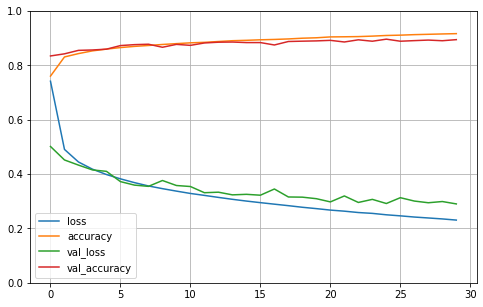

In [67]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [68]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[64.77403972167969, 0.835]

In [69]:
X_new = X_test[:3]

In [70]:
y_proba = model.predict(X_new)

In [71]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [72]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [73]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [74]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using the Sequential API

In [75]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [76]:
housing = fetch_california_housing()

In [77]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [79]:
model = keras.models.Sequential([
    keras.layers.Dense(
        30,
        activation="relu",
        input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)])

In [80]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 120us/sample - loss: 0.7327 - val_loss: 0.5818
Epoch 2/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4876 - val_loss: 0.4960
Epoch 3/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4523 - val_loss: 0.4703
Epoch 4/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4366 - val_loss: 0.4582
Epoch 5/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4264 - val_loss: 0.4567
Epoch 6/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.4196 - val_loss: 0.4368
Epoch 7/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4122 - val_loss: 0.4350
Epoch 8/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.4089 - val_loss: 0.4360
Epoch 9/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.4044 - val_

In [81]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

### Building Complex Models Using the Functional API

In [97]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [101]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [102]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [103]:
history = model.fit(
    (X_train_A, X_train_B),
    y_train,
    epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 125us/sample - loss: 1.9588 - val_loss: 0.9432
Epoch 2/20
11610/11610 [==============================] - 1s 93us/sample - loss: 0.8389 - val_loss: 0.8241
Epoch 3/20
11610/11610 [==============================] - 1s 93us/sample - loss: 0.7469 - val_loss: 0.7600
Epoch 4/20
11610/11610 [==============================] - 1s 94us/sample - loss: 0.6916 - val_loss: 0.7148
Epoch 5/20
11610/11610 [==============================] - 1s 94us/sample - loss: 0.6523 - val_loss: 0.6816
Epoch 6/20
11610/11610 [==============================] - 1s 94us/sample - loss: 0.6228 - val_loss: 0.6575
Epoch 7/20
11610/11610 [==============================] - 1s 94us/sample - loss: 0.6008 - val_loss: 0.6362
Epoch 8/20
11610/11610 [==============================] - 1s 93us/sample - loss: 0.5828 - val_loss: 0.6194
Epoch 9/20
11610/11610 [==============================] - 1s 94us/sample - loss: 0.5685 - val_

In [104]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [105]:
y_pred = model.predict((X_new_A, X_new_B))

In [107]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [108]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [109]:
history = model.fit(
    [X_train_A, X_train_B],
    [y_train, y_train],
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 189us/sample - loss: 1.1644 - main_output_loss: 1.0347 - aux_output_loss: 2.3288 - val_loss: 0.6826 - val_main_output_loss: 0.6012 - val_aux_output_loss: 1.4170
Epoch 2/20
11610/11610 [==============================] - 2s 142us/sample - loss: 0.5829 - main_output_loss: 0.5089 - aux_output_loss: 1.2470 - val_loss: 0.5887 - val_main_output_loss: 0.5184 - val_aux_output_loss: 1.2227
Epoch 3/20
11610/11610 [==============================] - 2s 141us/sample - loss: 0.5360 - main_output_loss: 0.4746 - aux_output_loss: 1.0879 - val_loss: 0.5466 - val_main_output_loss: 0.4882 - val_aux_output_loss: 1.0727
Epoch 4/20
11610/11610 [==============================] - 2s 142us/sample - loss: 0.5113 - main_output_loss: 0.4607 - aux_output_loss: 0.9656 - val_loss: 0.5200 - val_main_output_loss: 0.4714 - val_aux_output_loss: 0.9580
Epoch 5/20
11610/11610 [==============================] - 2s 14

In [110]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [111]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])